<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part4/P4_Ch03_CH03_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow / Keras

TensorFlow와 Keras는 ML 모델을 개발하고 학습시키는 데 도움이 되는 핵심 오픈소스 라이브러리입니다.

TensorFlow와 Keras는 모두 2015년에 릴리즈 되었습니다 (Keras는 2015년 3월, TensorFlow는 2015년 11월). 이는 딥러닝 세계의 관점에서 볼 때, 꽤 오랜시간이라고 볼 수 있습니다.

Keras는 사용자가 TensorFlow를 좀 더 쉽고 편하게 사용할 수 있게 해주는 high level API를 제공합니다.

TensorFlow 2.x에서는 Keras를 딥러닝의 공식 API로 채택하였고, Keras는 TensorFlow 내의 하나의 framwork으로 개발되고 있습니다.

## Tensorflow / Keras Basic


### Tensorflow / Keras Import


In [1]:
import tensorflow as tf
from tensorflow import keras


In [5]:
print(tf.__version__)
print(keras.__version__)

2.11.0
2.11.0


### Tensorflow / Keras 맛보기


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#MNIST dataset download
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_tset = x_train/255.0, x_test/255.0


11490434/11490434 [==============================] - 0s 0us/step


In [7]:
# Model 생성, compile
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [8]:
# Training / Evaluation
model.fit(x_train, y_train, epochs = 10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2967 - accuracy: 0.9136
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1430 - accuracy: 0.9575
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1083 - accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0878 - accuracy: 0.9724
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0723 - accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0652 - accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0603 - accuracy: 0.9810
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0529 - accuracy: 0.9826
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0483 - accuracy: 0.9844
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 14.033

[14.03300666809082, 0.9786999821662903]

### 데이터 탐색


In [9]:
idx = np.random.randint(len(x_train))
image = x_train[idx]

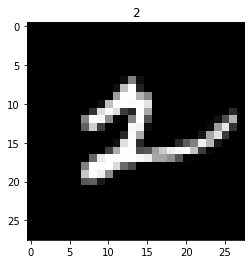

In [10]:
plt.imshow(image, cmap ='gray')
plt.title(y_train[idx])
plt.show()

내가 쓴 손글씨로 test
- colab : 아래 cell 실행해서 파일 업로드  
- 그림판같은 도구로 손으로 숫자를 쓴 후 파일로 저장하여 업로드  
- 파일명 : image.png

In [23]:
import os
from PIL import Image
from google.colab import files 

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length = len(uploaded[fn])))

Saving image.png to image.png
User uploaded file "image.png" with length 515 bytes


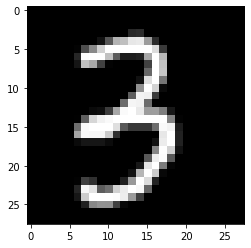

In [24]:
# image file의 경로 설정 
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')

#image file 읽기
cur_img = Image.open(img_path)

# 28x28로 resize
cur_img = cur_img.resize((28,28))
image = np.asarray(cur_img)

#color image일 경우 RGB평균값으로 gray scale로 변경
try :
  image = np.mean(image, axis = 2)
except:
  pass

#upload한 image는 흰 배경에 검은 글씨로 되어 있으므로, MNIST data 와 같이 검은 배경에 흰 글씨로 변경
image = np.abs(255-image)

#MNIST와 동일하게 data preprocessing(255로 나눠줌) --> pixel값이 0-1사이로 스케일링 됨
image = image.astype(np.float32)/255.

#화면에 출력하여 확인
plt.imshow(image, cmap = 'gray')
plt.show()

In [25]:
# shape을 변경하여 학습된 model에 넣고 결과 확인
image = np.reshape(image, (1,28,28))
print(model.predict(image))
print('Model이 예측한 값은 {}입니다.'.format(np.argmax(model.predict(image),-1)))

1/1 [==============================] - 0s 23ms/step
[[5.0358962e-16 2.7107438e-14 2.1137801e-07 9.9999964e-01 5.1781507e-13
  9.5583963e-10 4.8127912e-15 1.4951226e-07 3.2321975e-11 1.5054166e-13]]
1/1 [==============================] - 0s 22ms/step
Model이 예측한 값은 [3]입니다.


#Tensor
Tensor는 Multidimensional array를 나타내는 말로, Tensorflow의 기본 datatype이다.

In [26]:
# Hello World
hello = tf.constant([3,3], dtype = tf.float32)
print(hello)

tf.Tensor([3. 3.], shape=(2,), dtype=float32)


In [27]:
# 상수형 tensor
# 출력시 tensor의 값과 함께, shape과 내부의 data type을 함께 볼 수 있다.
 
x = tf.constant([[1.0, 2.0], 
                 [3.0, 4.0]])
print(x)
print(type(x))

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [28]:
# numpy ndarray와 list도 tensor로 바꿀 수 있다.

x_np = np.array([[1.0, 2.0], 
                 [3.0, 4.0]])
x_list=[[1.0, 2.0],  
        [3.0, 4.0]]

print(type(x_np))
print(type(x_list))

<class 'numpy.ndarray'>
<class 'list'>


In [29]:
x_np =tf.convert_to_tensor(x_np)
x_list = tf.convert_to_tensor(x_list)

print(type(x_np))
print(type(x_list))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [30]:
#tensor를 numpy ndarray로 바꾸기
x.numpy()

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [31]:
print(type(x.numpy()))

<class 'numpy.ndarray'>


In [32]:
a = tf.ones((2,3))
b = tf.zeros((2,3))
c = tf.fill((2,3), 2)   #numpy 에서는 full
print(a)
print(b)
print(c)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[2 2 2]
 [2 2 2]], shape=(2, 3), dtype=int32)


In [34]:
d = tf.zeros_like(c)
e = tf.ones_like(c)
print(d)
print(e)
# shape뿐만 아니라 type도 가져온다

tf.Tensor(
[[0 0 0]
 [0 0 0]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[1 1 1]
 [1 1 1]], shape=(2, 3), dtype=int32)


In [36]:
f =tf.eye(3) # identity matric
print(f)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [37]:
g = tf.range(10) # numpy arange
print(g)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


In [38]:
h = tf.random.uniform((2,2))  #np.rand
i = tf.random.normal((2,2))  # np.randn
print(h)
print(i)

tf.Tensor(
[[0.29398823 0.81652355]
 [0.09855723 0.43515563]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.90031993  1.2698799 ]
 [ 0.27028805 -0.03164024]], shape=(2, 2), dtype=float32)


## tensor의 속성


In [39]:
tensor = tf.random.normal((3,4))
print(f"Shape of tensor: {tensor.shape}" )
print(f"Datatype of tensor:{tensor.dtype}")

Shape of tensor: (3, 4)
Datatype of tensor:<dtype: 'float32'>


In [40]:
from traceback import print_exc
# 속성 변경
tensor = tf.reshape(tensor, (4,3))
tensor = tf.cast(tensor, tf.int32)

print(f"Shape of tensor: {tensor.shape}" )
print(f"Datatype of tensor:{tensor.dtype}")

Shape of tensor: (4, 3)
Datatype of tensor:<dtype: 'int32'>


### Variable


In [41]:
#tensor의 값 변경 - 불가능
tensor = tf.ones((3,4))
print(tensor)

tensor[0,0] =2.

tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)


TypeError: ignored

In [43]:
# 값 변경이 가능-> variable만들기

variable = tf.Variable(tensor)
print(variable)

variable[0,0].assign(2)
print(variable)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[2., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>


In [44]:
# 초기값을 사용하여 Variable을 생성할 수 있습니다.
initial_value = tf.random.normal(shape = (2,2))
weight = tf.Variable(initial_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.5619598 ,  0.83835036],
       [-0.30727616,  0.52142155]], dtype=float32)>


In [45]:
# variable을 초기화 해주는 initializer를 사용가능
weight = tf.Variable(tf.random_normal_initializer(stddev =1.)(shape=(2,2)))
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.12720415, -1.2047654 ],
       [-0.40162426,  0.49296093]], dtype=float32)>


In [46]:
# variable 은 assign(value), assign_add(increment): 더하기, assign_sub(decrement): 빼기와 같은 메소드를 사용해서 Variable을 갱신한다

new_value = tf.random.normal(shape = (2,2))
print(new_value)

weight.assign(new_value)
print(weight)

tf.Tensor(
[[0.37551573 0.7981924 ]
 [2.2602932  0.2227971 ]], shape=(2, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.37551573, 0.7981924 ],
       [2.2602932 , 0.2227971 ]], dtype=float32)>


In [49]:
added_value = tf.ones(shape = (2,2))
weight.assign_add(added_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1.3755157, 1.7981924],
       [3.2602932, 1.2227972]], dtype=float32)>


In [50]:
added_value = tf.ones(shape = (2,2))
weight.assign_sub(added_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.3755157 , 0.7981924 ],
       [2.2602932 , 0.22279716]], dtype=float32)>


### indexing 과 slicing


In [51]:
a = tf.range(1,13)
a = tf.reshape(a, (3,4))
print(a)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


In [52]:
# indexing
print(a[1])
print(a[0,-1])

tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [54]:
# slicing 
print(a[1:-1])
print(a[:2, 2:])

tf.Tensor([[5 6 7 8]], shape=(1, 4), dtype=int32)
tf.Tensor(
[[3 4]
 [7 8]], shape=(2, 2), dtype=int32)


### Transpose


In [56]:
a = tf.range(16)
print(a)
a = tf.reshape(a, (2,2,-1))
print(a)

tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15], shape=(16,), dtype=int32)
tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]], shape=(2, 2, 4), dtype=int32)


In [57]:
b = tf.transpose(a, (2,0,1))
print(b)

tf.Tensor(
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]], shape=(4, 2, 2), dtype=int32)


### Tensor 연산

In [58]:
# 기본적으로 element-wise
x = tf.constant([[1,2],[3,4]], dtype = tf.float32)
y = tf.constant([[3,4],[5,6]], dtype = tf.float32)
print(x)
print(y)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[3. 4.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [62]:
print(x + y)
print(x - y)
print(x * y)
print(x /y)
print(x @ y)
print('='*30)
print(tf.add(x,y))
print(tf.subtract(x,y))
print(tf.multiply(x,y))
print(tf.divide(x,y))
print(tf.matmul(x,y))

tf.Tensor(
[[ 4.  6.]
 [ 8. 10.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-2. -2.]
 [-2. -2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 3.  8.]
 [15. 24.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.33333334 0.5       ]
 [0.6        0.6666667 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[13. 16.]
 [29. 36.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 4.  6.]
 [ 8. 10.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-2. -2.]
 [-2. -2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 3.  8.]
 [15. 24.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.33333334 0.5       ]
 [0.6        0.6666667 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[13. 16.]
 [29. 36.]], shape=(2, 2), dtype=float32)


In [63]:
z = tf.range(1,11)
z = tf.reshape(z, (2,5))
print(z)


tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(2, 5), dtype=int32)


In [66]:
print(tf.reduce_sum(z))

tf.Tensor(55, shape=(), dtype=int32)


In [65]:
sum1 = tf.reduce_sum(z, axis = 0)
sum2 = tf.reduce_sum(z, axis =1)
sum3 = tf.reduce_sum(z, axis =-1)
print(sum1)
print(sum2)
print(sum3)

tf.Tensor([ 7  9 11 13 15], shape=(5,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)


In [67]:
concat = tf.concat([z,z], axis = 0)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(4, 5), dtype=int32)


In [68]:
concat = tf.concat([z,z], axis = 1)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5  1  2  3  4  5]
 [ 6  7  8  9 10  6  7  8  9 10]], shape=(2, 10), dtype=int32)


In [69]:
concat = tf.concat([z,z], axis = -1)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5  1  2  3  4  5]
 [ 6  7  8  9 10  6  7  8  9 10]], shape=(2, 10), dtype=int32)


In [71]:
stack = tf.stack([z,z], axis = 0) # axis = 0이기 때문에 맨 앞에 축을 생성하면서 쌓인다 -> 차원이 늘어난다(concat과 다른점. numpy도 동일!)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 6  7  8  9 10]]

 [[ 1  2  3  4  5]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)


In [72]:
stack = tf.stack([z,z], axis = -1) # axis = -1이기 때문에 맨 뒤에 축을 생성하면서 쌓인다-> 차원이 늘어난다(concat과 다른점. numpy도 동일!)
print(stack)

tf.Tensor(
[[[ 1  1]
  [ 2  2]
  [ 3  3]
  [ 4  4]
  [ 5  5]]

 [[ 6  6]
  [ 7  7]
  [ 8  8]
  [ 9  9]
  [10 10]]], shape=(2, 5, 2), dtype=int32)


In [73]:
stack = tf.stack([z,z], axis = 1) # axis = 1이기 때문에 두번째에 축을 생성하면서 쌓인다-> 차원이 늘어난다(concat과 다른점. numpy도 동일!)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 1  2  3  4  5]]

 [[ 6  7  8  9 10]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)
